In [1]:
%matplotlib notebook
import matplotlib.pyplot as pl
from astropy.io import fits
from ngmix.medsreaders import NGMixMEDS
import numpy as np
import galsim
import fitsio
import meds

Let's look at several files: the gplus and gminus outputs from the v002 test

In [2]:
minusname = './cats/DES2122-0124_r2601p01_r_cat_gminus.fits'
#taken from: /home/secco/project2-kicp-secco/delve/saved_outputs/v002_wcs_False/outputs_DES2122-0124_seed0_gminus/meds-DES2122-0124-r/sources-r/OPS/multiepoch/Y3A1/r2601/DES2122-0124/p01/cat

plusname = './cats/DES2122-0124_r2601p01_r_cat_gplus.fits'
#taken from: /home/secco/project2-kicp-secco/delve/saved_outputs/v002_wcs_False/outputs_DES2122-0124_seed0_gplus/meds-DES2122-0124-r/sources-r/OPS/multiepoch/Y3A1/r2601/DES2122-0124/p01/cat

In [3]:
plus = fits.open(plusname)
plus.info()
plus[1].header

Filename: ./cats/DES2122-0124_r2601p01_r_cat_gplus.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     34   90000R x 13C   [J, J, J, J, J, E, E, D, D, E, E, I, E]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   58 / width of table in bytes                        
NAXIS2  =                90000 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   13 / number of fields in each row                   
TTYPE1  = 'number  '           / label for field   1                            
TFORM1  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'xmin_image'         / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'ymin_image'      

In [4]:
minus = fits.open(minusname)
minus.info()
minus[1].header

Filename: ./cats/DES2122-0124_r2601p01_r_cat_gminus.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     34   90000R x 13C   [J, J, J, J, J, E, E, D, D, E, E, I, E]   


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   58 / width of table in bytes                        
NAXIS2  =                90000 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   13 / number of fields in each row                   
TTYPE1  = 'number  '           / label for field   1                            
TFORM1  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE2  = 'xmin_image'         / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'ymin_image'      

Both of the above look like truth catalogs. They have 90k entries, which correspond to the 300x300 grid we are simulating over

Let's now look at the actually simulated images

In [2]:
mplus = meds.MEDS('./meds/DES2122+0126_r_meds-y3v02_gplus.fits.fz')
print(mplus)
mminus = meds.MEDS('./meds/DES2122+0126_r_meds-y3v02_gminus.fits.fz')
print(mminus)

fitsmminus = fits.open('./meds/DES2122+0126_r_meds-y3v02_gminus.fits.fz')


  file: ./meds/DES2122+0126_r_meds-y3v02_gplus.fits.fz
  extension: 1
  type: BINARY_TBL
  extname: object_data
  rows: 90000
  column info:
    id                  i8  
    box_size            i8  
    ra                  f8  
    dec                 f8  
    ncutout             i8  
    file_id             i8  array[6]
    start_row           i8  array[6]
    orig_row            f8  array[6]
    orig_col            f8  array[6]
    orig_start_row      i8  array[6]
    orig_start_col      i8  array[6]
    cutout_row          f8  array[6]
    cutout_col          f8  array[6]
    dudrow              f8  array[6]
    dudcol              f8  array[6]
    dvdrow              f8  array[6]
    dvdcol              f8  array[6]
    number              i8  
    psf_row_size        i4  array[6]
    psf_col_size        i4  array[6]
    psf_cutout_row      f8  array[6]
    psf_cutout_col      f8  array[6]
    psf_start_row       i8  array[6]

  file: ./meds/DES2122+0126_r_meds-y3v02_gminus.fits.f

In [31]:
np.unique(fitsmminus['bmask_cutouts'].data)

array([0, 1], dtype=int32)

In [15]:
#useful methods below
help(mplus)

Help on MEDS in module meds.meds object:

class MEDS(builtins.object)
 |  MEDS(filename)
 |  
 |  Class to work with MEDS (Multi Epoch Data Structures)
 |  
 |  For details of the data structure, see
 |  https://cdcvs.fnal.gov/redmine/projects/deswlwg/wiki/Multi_Epoch_Data_Structure
 |  
 |  One can extract cutouts using `get_cutout()` and `get_mosaic()` and
 |  `get_cutout_list()`.
 |  
 |  One can access all fields from the catalog using `[field_name]` notation.
 |  The number of entries is in the `.size` attribute. Note the actual fields
 |  in the catalog may change over time.  You can use `get_cat()` to get the
 |  full catalog as a `recarray`.
 |  
 |  The first cutout for an object is always from the coadd.
 |  
 |  Parameters
 |  ----------
 |  filename : str
 |      The path to the MEDS file.
 |  
 |  Attributes
 |  ----------
 |  size : int
 |      The number of objects in the file.
 |  
 |  Methods
 |  -------
 |  close()
 |      Close the underlying FITS file.
 |  get_cutou

So let's compare some images between the plus and minus cases

<IPython.core.display.Javascript object>


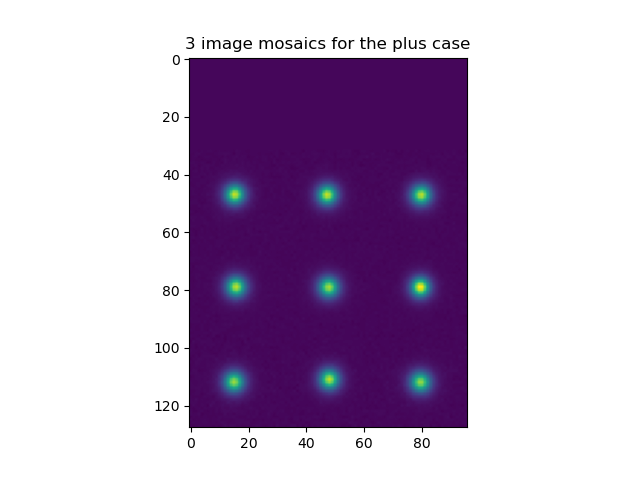

<IPython.core.display.Javascript object>


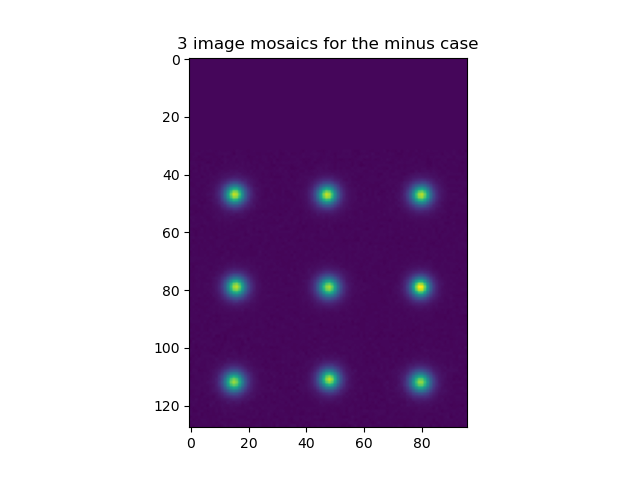

In [6]:
pl.figure()
images_plus = np.hstack((mplus.get_mosaic(30),mplus.get_mosaic(31),mplus.get_mosaic(33)))
pl.title('3 image mosaics for the plus case')
pl.imshow(images_plus)
pl.figure()
images_minus = np.hstack((mminus.get_mosaic(30),mminus.get_mosaic(31),mminus.get_mosaic(33)))
pl.title('3 image mosaics for the minus case')
pl.imshow(images_minus)

<IPython.core.display.Javascript object>


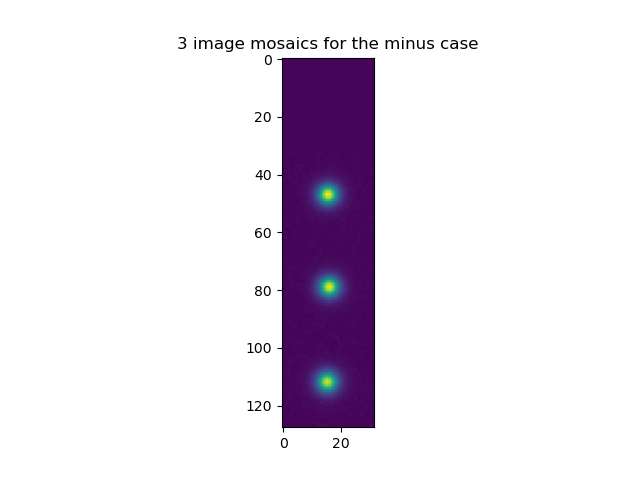

In [7]:
pl.figure()
images_minus = mminus.get_mosaic(30)
pl.title('3 image mosaics for the minus case')
pl.imshow(images_minus)

Now compare PSF mosaics

<IPython.core.display.Javascript object>


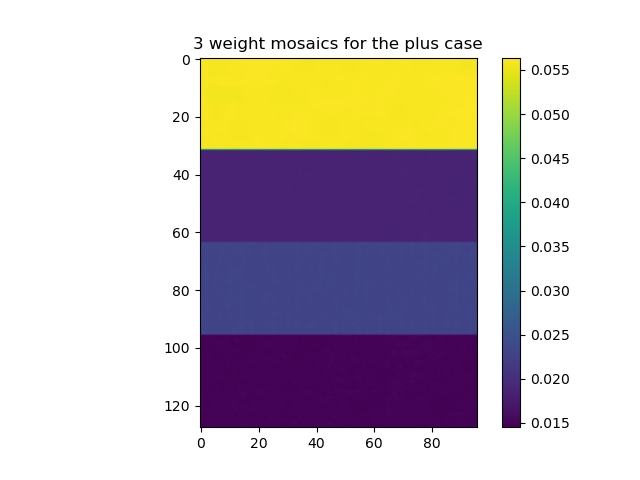

<IPython.core.display.Javascript object>


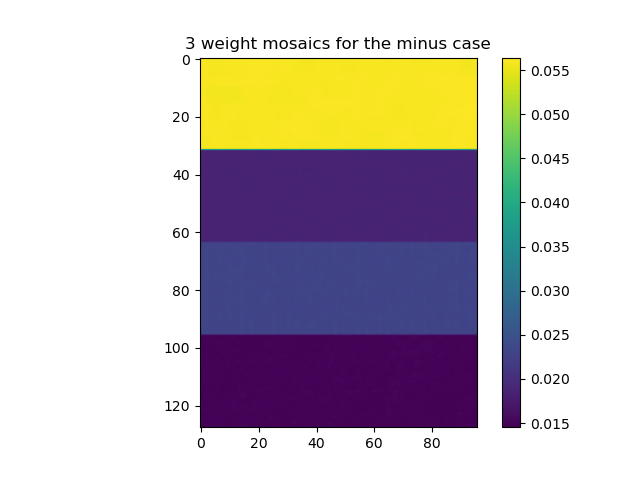

In [8]:
pl.figure()
images_plus = np.hstack((mplus.get_mosaic(30,type='weight'),mplus.get_mosaic(31,type='weight'),mplus.get_mosaic(33,type='weight')))
pl.title('3 weight mosaics for the plus case')
pl.imshow(images_plus)
pl.colorbar()

pl.figure()
images_minus = np.hstack((mminus.get_mosaic(30,type='weight'),mminus.get_mosaic(31,type='weight'),mminus.get_mosaic(33,type='weight')))
pl.title('3 weight mosaics for the minus case')
pl.imshow(images_minus)
pl.colorbar()


In [6]:
mplus.get_cutout(1273, 3, type='weight').flatten()/mminus.get_cutout(1273, 3, type='weight').flatten()

array([0.999742  , 1.0006732 , 0.99884653, ..., 0.9989262 , 1.0008042 ,
       0.99914   ], dtype=float32)

/Users/secco/opt/anaconda3/envs/delve_shear/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


<IPython.core.display.Javascript object>


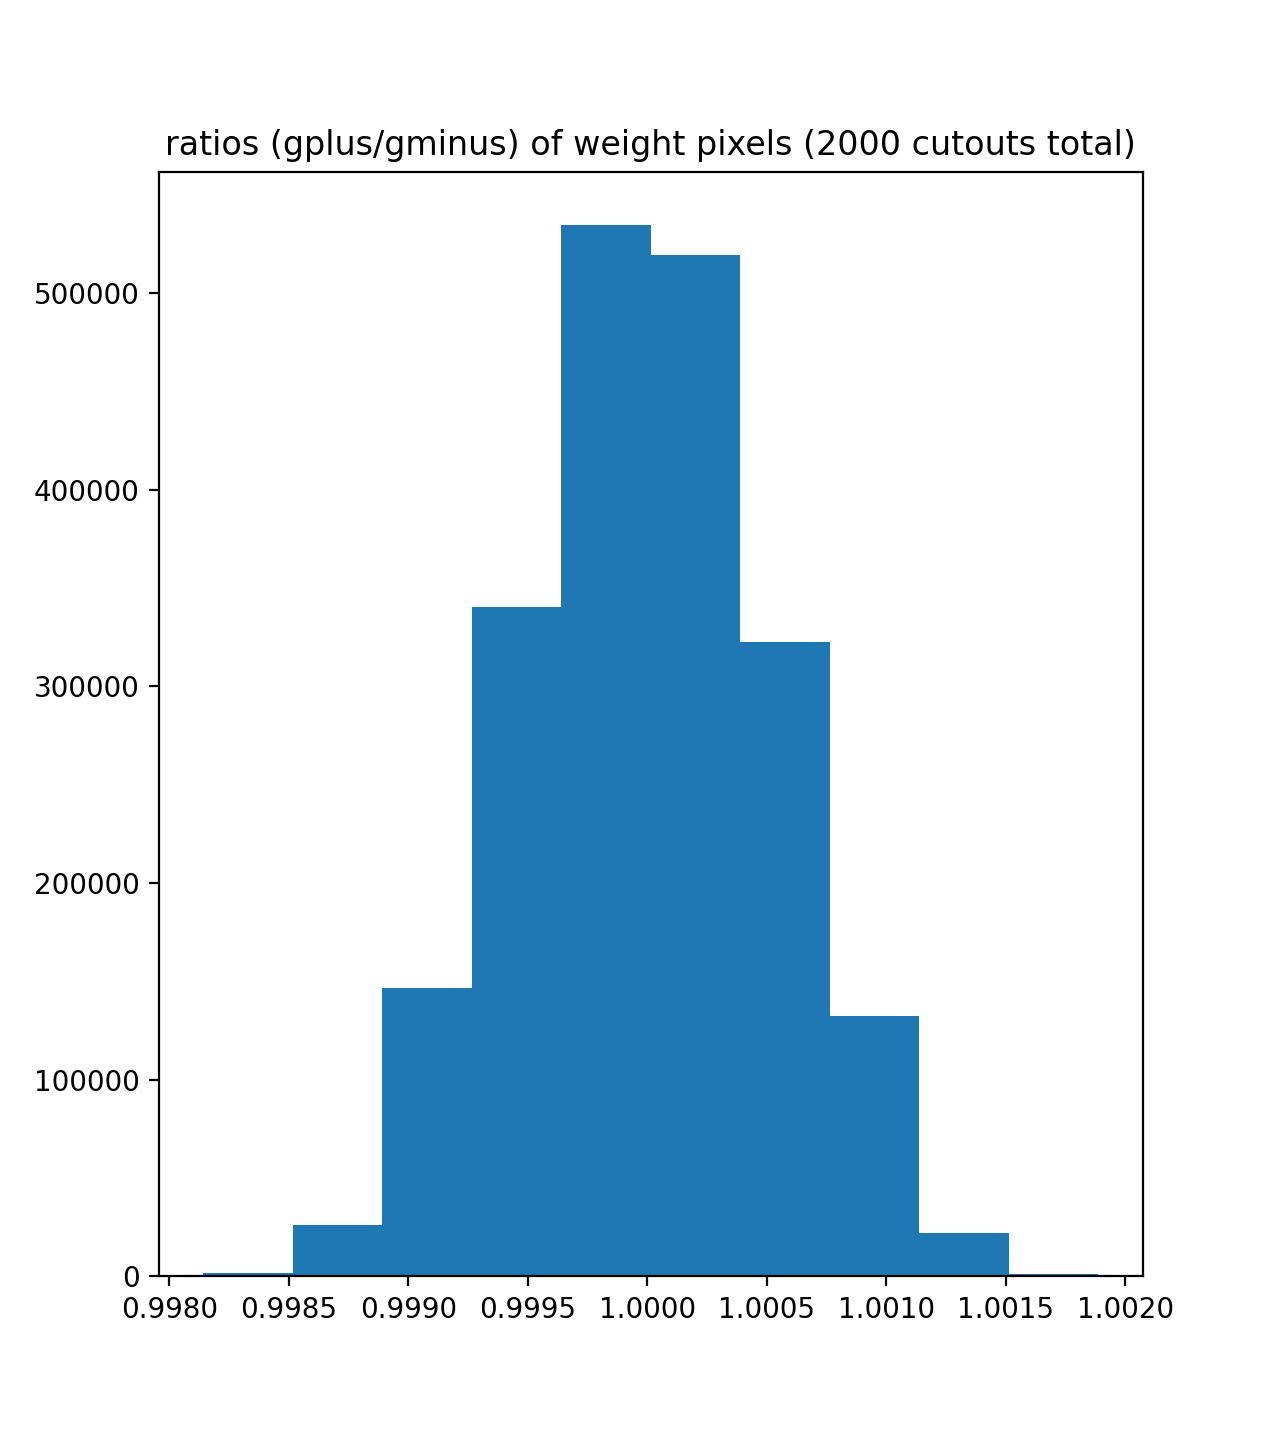

In [8]:
ratios_of_weights=np.array([])
for iobj in range(1000):
    for icutout in [1,2]:
        pp = mplus.get_cutout(iobj, icutout, type='weight').flatten()
        mm = mminus.get_cutout(iobj, icutout, type='weight').flatten()
        ratios_of_weights = np.append(ratios_of_weights, pp/mm)

pl.figure()
pl.hist(ratios_of_weights)

pl.title('ratios (gplus/gminus) of weight pixels (2000 cutouts total)')
pl.show()

In [ ]:
pixelratio = np.array([])
for i in range(1000):
    for j in [1,2]:
        pixelratio=np.append(pixelratio,mplus.get_psf_list(i)[j]/mminus.get_psf_list(i)[j])
 

<IPython.core.display.Javascript object>


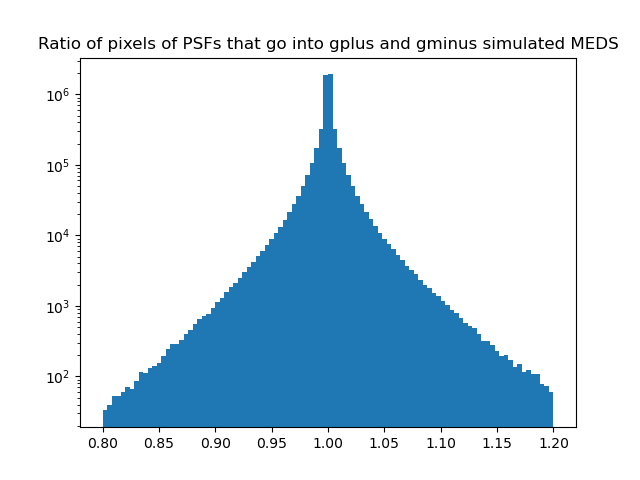

In [44]:
pl.figure()
pl.hist(pixelratio,range=[0.8,1.2],bins=100)
pl.yscale('log')
pl.title('Ratio of pixels of PSFs that go into gplus and gminus simulated MEDS')
pl.show()

In [45]:
w = np.where(np.abs(pixelratio-1)>0.05)[0]
len(pixelratio[w])/len(pixelratio)

0.019404592381630472

<IPython.core.display.Javascript object>


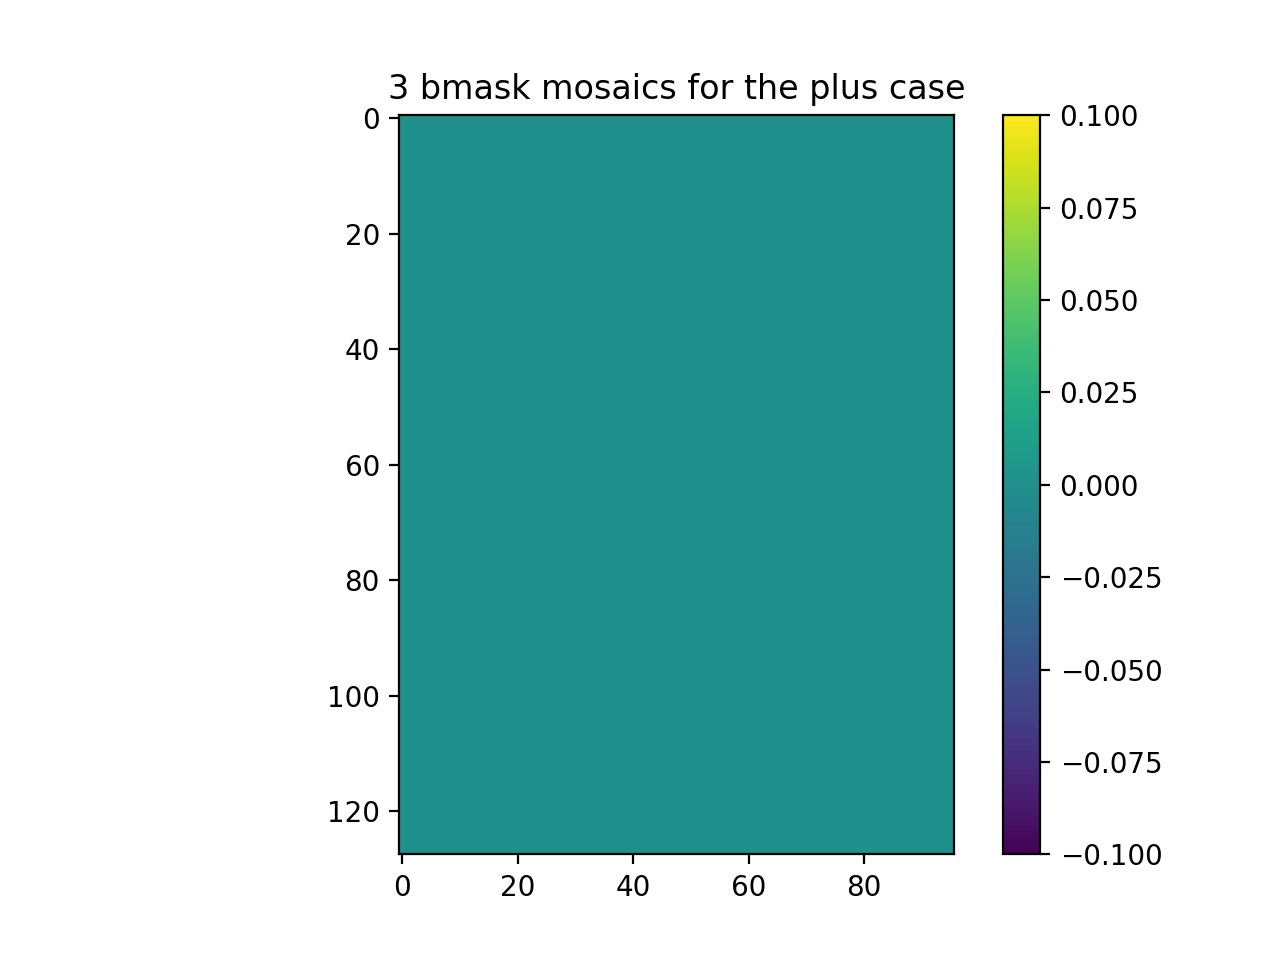

<IPython.core.display.Javascript object>


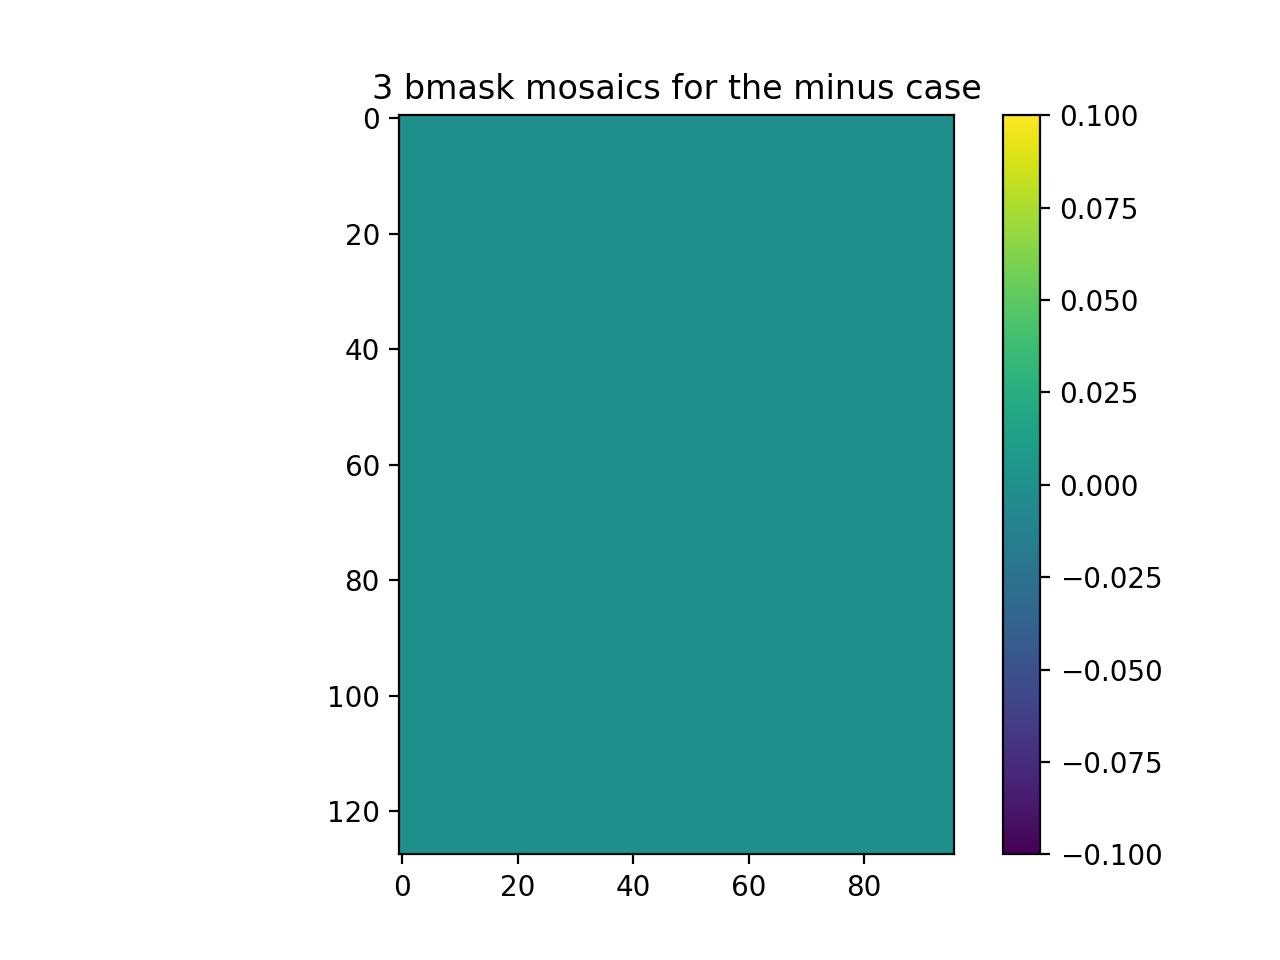

In [48]:
I,J,K = 30,31,32
pl.figure()
images_plus = np.hstack((mplus.get_mosaic(I,type='bmask'),mplus.get_mosaic(J,type='bmask'),mplus.get_mosaic(K,type='bmask')))
pl.title('3 bmask mosaics for the plus case')
pl.imshow(images_plus)
pl.colorbar()

pl.figure()
images_minus = np.hstack((mminus.get_mosaic(I,type='bmask'),mminus.get_mosaic(J,type='bmask'),mminus.get_mosaic(K,type='bmask')))
pl.title('3 bmask mosaics for the minus case')
pl.imshow(images_minus)
pl.colorbar()


In [49]:
mplus['ncutout']

array([4, 4, 4, ..., 2, 3, 3])

In [53]:
print((mminus['ncutout']/mplus['ncutout']).max())
print((mminus['ncutout']/mplus['ncutout']).min())

1.0
1.0


# Looking at v003 MEDS files

In [14]:
#MEDS files taken from eg:
#'/home/secco/project2-kicp-secco/delve/saved_outputs/v003_expgal_psfex/outputs_DES2134+0126_seed0_gminus/meds/y3v02/DES2134+0126...'
plus3 = meds.MEDS('./meds/DES2134+0126_r_meds-y3v02_v003_gplus.fits.fz')
print(plus3)
minus3 = meds.MEDS('./meds/DES2134+0126_r_meds-y3v02_v003_gminus.fits.fz')
print(minus3)


  file: ./meds/DES2134+0126_r_meds-y3v02_v003_gplus.fits.fz
  extension: 1
  type: BINARY_TBL
  extname: object_data
  rows: 90000
  column info:
    id                  i8  
    box_size            i8  
    ra                  f8  
    dec                 f8  
    ncutout             i8  
    file_id             i8  array[6]
    start_row           i8  array[6]
    orig_row            f8  array[6]
    orig_col            f8  array[6]
    orig_start_row      i8  array[6]
    orig_start_col      i8  array[6]
    cutout_row          f8  array[6]
    cutout_col          f8  array[6]
    dudrow              f8  array[6]
    dudcol              f8  array[6]
    dvdrow              f8  array[6]
    dvdcol              f8  array[6]
    number              i8  
    psf_row_size        i4  array[6]
    psf_col_size        i4  array[6]
    psf_cutout_row      f8  array[6]
    psf_cutout_col      f8  array[6]
    psf_start_row       i8  array[6]

  file: ./meds/DES2134+0126_r_meds-y3v02_v003_gmi

In [ ]:
pixelratio = np.array([])
for i in range(1000):
    for j in [1,2]:
        pixelratio=np.append(pixelratio,plus3.get_psf_list(i)[j]/minus3.get_psf_list(i)[j])
 

<IPython.core.display.Javascript object>


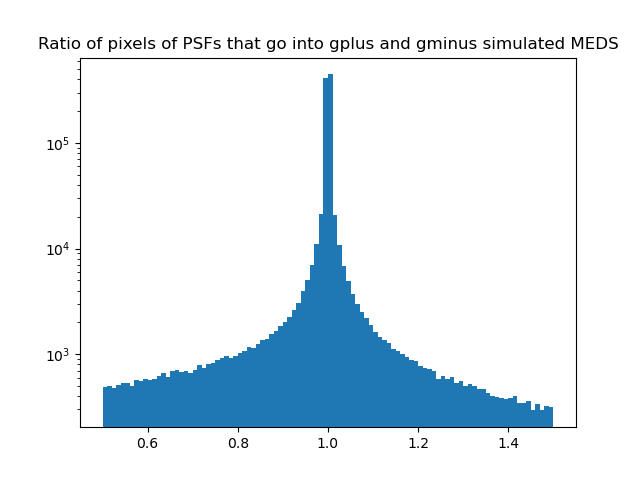

In [40]:
pl.figure()
pl.hist(pixelratio,range=[0.5,1.5],bins=100)
pl.yscale('log')
pl.title('Ratio of pixels of PSFs that go into gplus and gminus simulated MEDS')
pl.show()

In [42]:
w = np.where(np.abs(pixelratio-1)>0.05)[0]
len(pixelratio[w])/len(pixelratio)

0.030221431114275544

In [23]:
fitsplus3 = fits.open('./meds/DES2134+0126_r_meds-y3v02_v003_gplus.fits.fz')

402189

In [25]:
nonzerobmask = np.where(fitsplus3['bmask_cutouts'].data!=0)[0]

In [27]:
np.unique(fitsplus3['bmask_cutouts'].data[nonzerobmask])

array([1], dtype=int32)

# PSF

In [55]:
i = np.load('psf_im.npy')
i2 = np.load('psf_im2.npy')

<IPython.core.display.Javascript object>


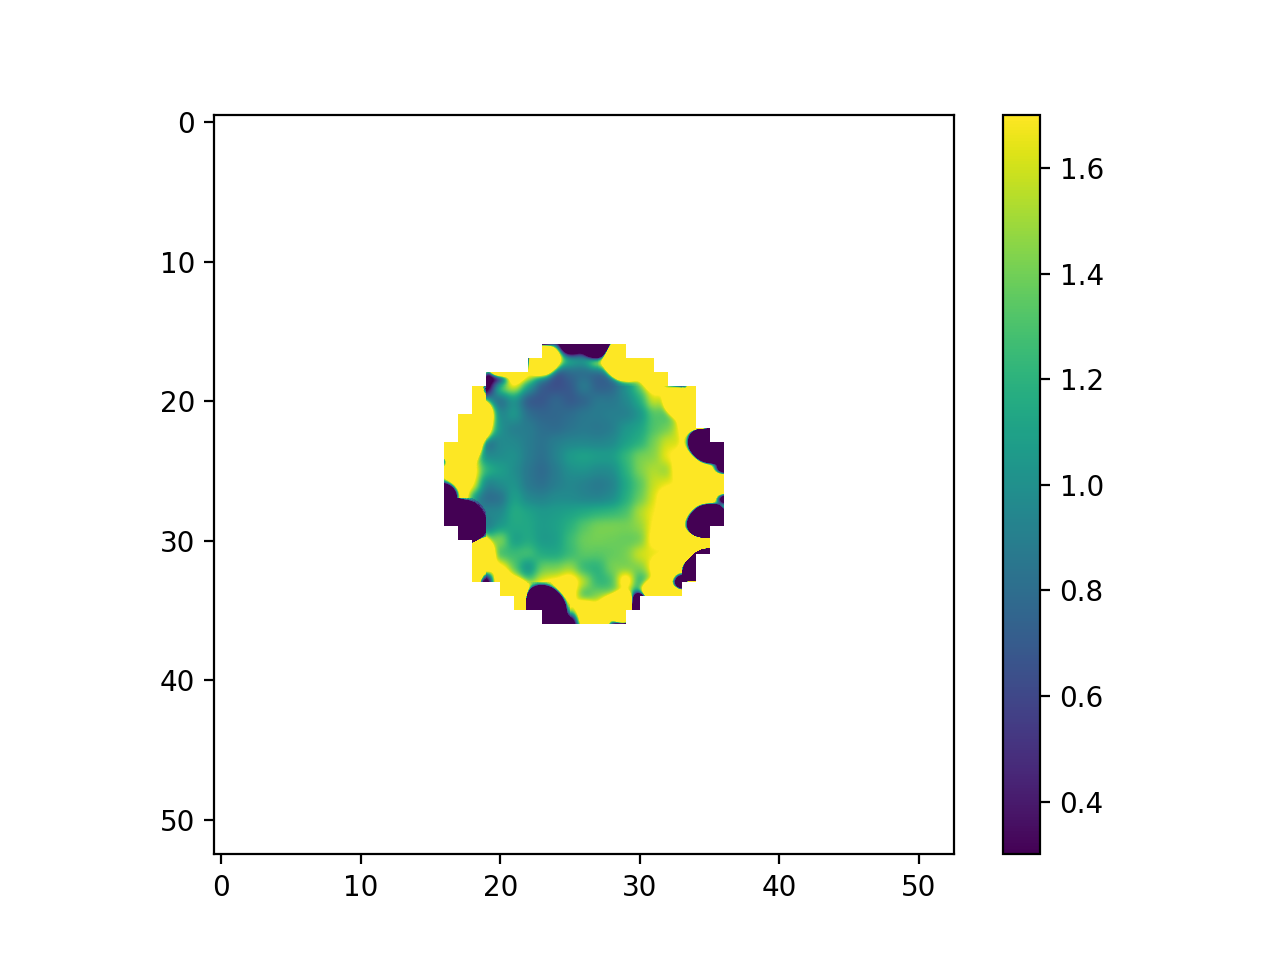

/Users/secco/opt/anaconda3/envs/delve_shear/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/secco/opt/anaconda3/envs/delve_shear/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/secco/opt/anaconda3/envs/delve_shear/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/secco/opt/anaconda3/envs/delve_shear/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [66]:
pl.figure()
#i[26,26]=0
ratio = i/i2
pl.imshow(i/i2,vmin=0.3,vmax=1.7,interpolation='gaussian')
pl.colorbar()
